In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('datasets/Retail_Store_Cleaned.csv')

In [70]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'order_date', 'year',
       'month'],
      dtype='object')

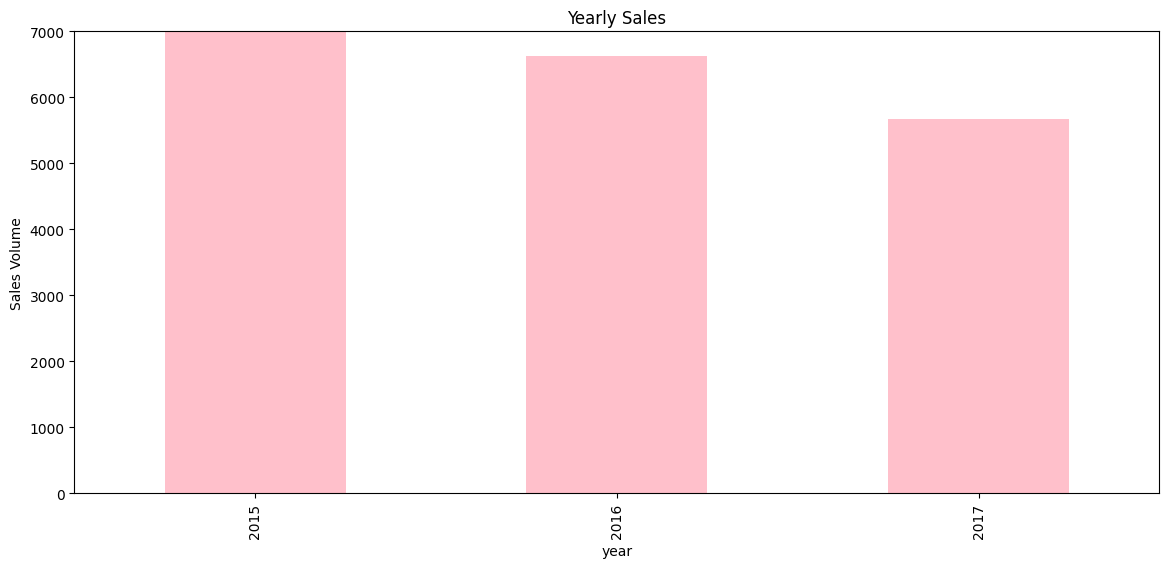

In [45]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Yearly Sales', color='pink')
plt.rcParams['figure.figsize'] = (14, 6)
plt.ylim(0, 7000)
plt.ylabel('Sales Volume')
plt.show()

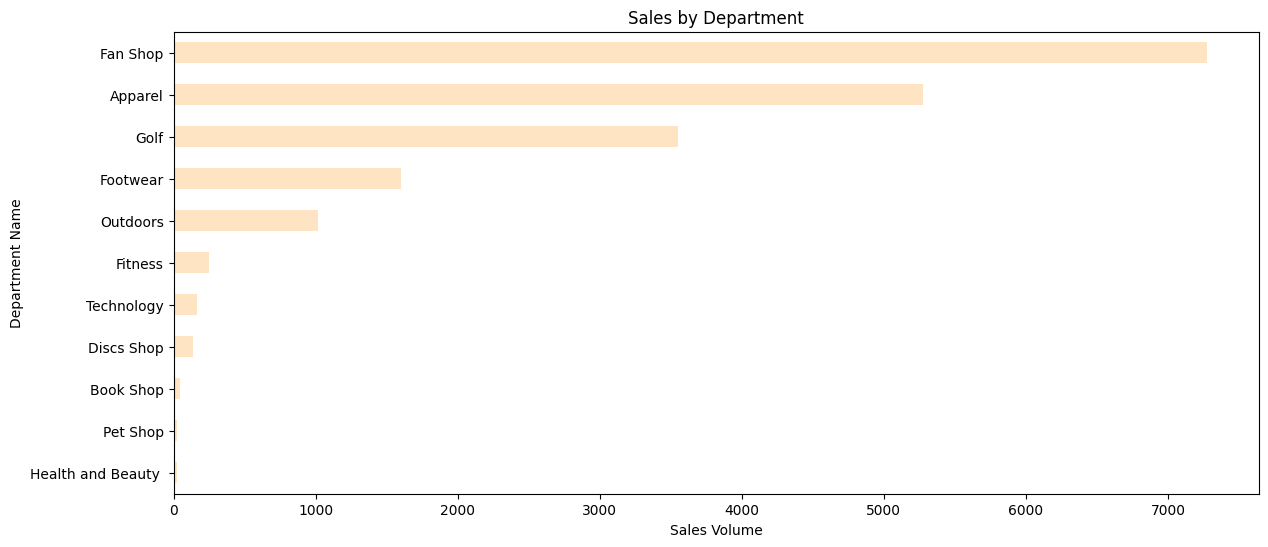

In [107]:
df['Department Name'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Sales by Department', color='bisque')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xlabel('Sales Volume')
plt.show()

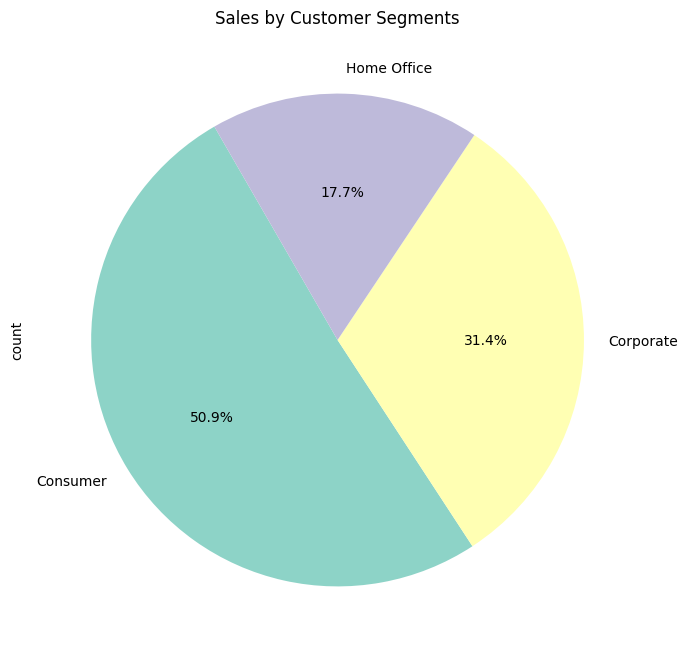

In [52]:
df['Customer Segment'].value_counts().sort_index().plot(kind='pie', title='Sales by Customer Segments', autopct='%1.1f%%', startangle=120, figsize=(8, 8), colors = sns.color_palette("Set3"))
plt.rcParams['figure.figsize'] = (14, 6)
plt.show()

In [10]:
df['Revenue'] = df['Order Item Product Price'] * df['Order Item Quantity']
annual_revenue = df.groupby('year')['Revenue'].sum()
print(annual_revenue)

year
2015    1.402915e+06
2016    1.314538e+06
2017    1.267870e+06
Name: Revenue, dtype: float64


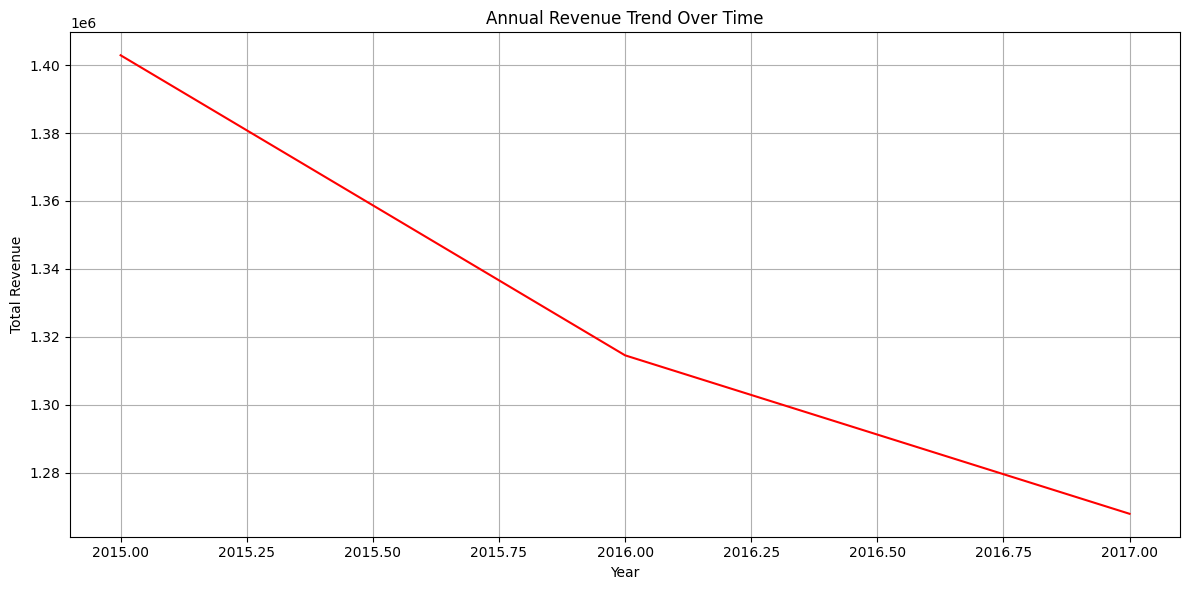

In [51]:
# Plotting the revenue trend over years
annual_revenue.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Annual Revenue Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

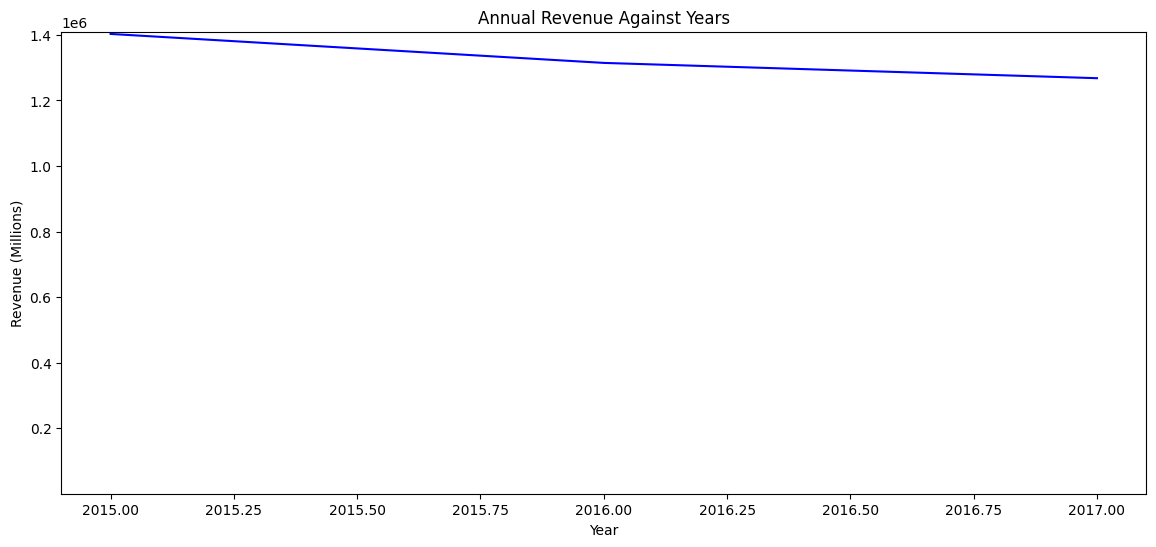

In [47]:
annual_revenue.plot(kind='line', figsize=(14, 6), color='blue')
plt.title('Annual Revenue Against Years')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.ylim(bottom=1.0)
plt.show()

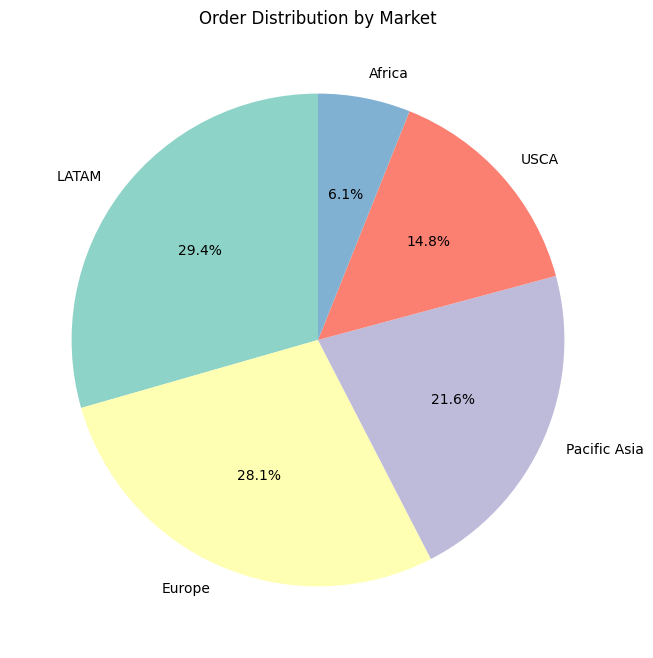

In [38]:
market_counts = df['Market'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, startangle=90, autopct="%.1f%%", colors = sns.color_palette("Set3"))

# Adding a title
plt.title('Order Distribution by Market')

# Display the plot
plt.show()

In [71]:
print(df['Customer Segment'].unique())
print(df['Department Name'].unique())

['Consumer' 'Corporate' 'Home Office']
['Fitness' 'Apparel' 'Technology' 'Footwear' 'Golf' 'Fan Shop' 'Book Shop'
 'Discs Shop' 'Health and Beauty ' 'Outdoors' 'Pet Shop']


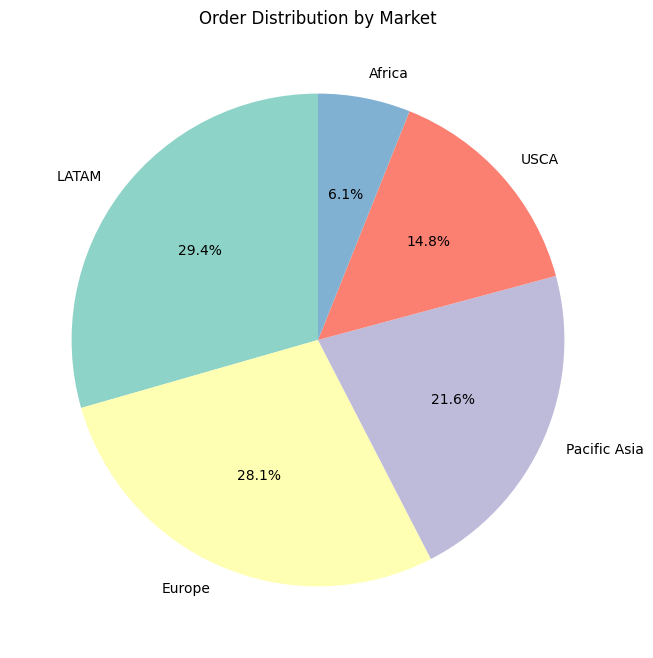

In [41]:
market_counts = df['Market'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, startangle=90, autopct="%.1f%%",colors = sns.color_palette("Set3"))

plt.title('Order Distribution by Market')
plt.show()

    month     year
0       1  3376817
1       2  3320319
2       3  3473513
3       4  3622736
4       5  3445357
5       6  3233586
6       7  3471479
7       8  3197308
8       9  3497717
9      10  2810010
10     11  2761532
11     12  2836132


C:\Users\lijaa\AppData\Local\Temp\ipykernel_13664\1606513256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'month', y = 'year', data = cumul_monthly_sales, palette = 'Blues_d')


Text(0.5, 0, 'month')

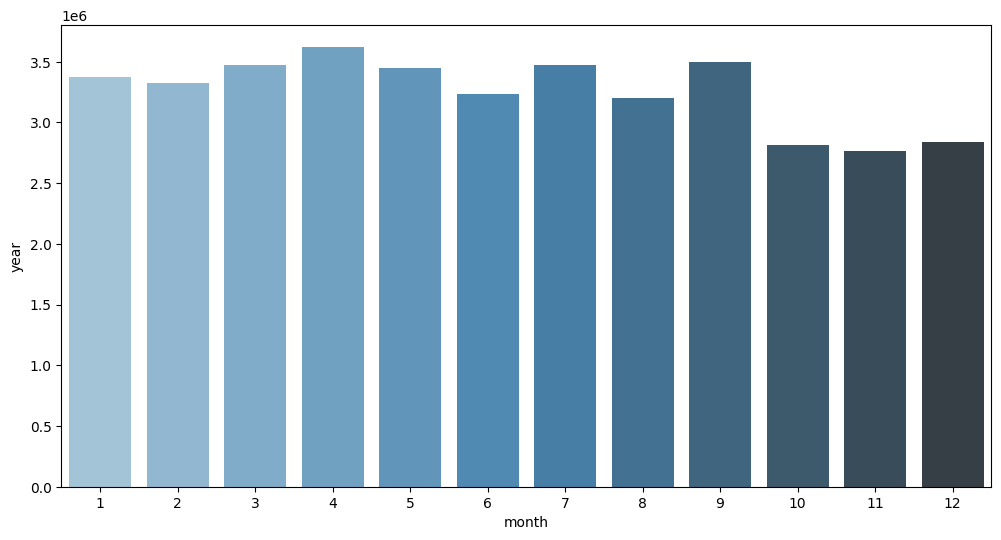

In [76]:
cumul_monthly_sales = df.groupby('month')['year'].sum().reset_index()
print(cumul_monthly_sales)

plt.figure(figsize = (12,6))
sns.barplot(x = 'month', y = 'year', data = cumul_monthly_sales, palette = 'Blues_d')
plt.xlabel('month')

In [80]:
highest_sales_per_month = df.groupby('year')['month'].max()
print(highest_sales_per_month)

year
2015    12
2016    12
2017    12
Name: month, dtype: int64


In [31]:
# Relationship between Sales and Department
department = df.groupby(by=['Department Name'], as_index=False)['year'].sum
rs1 = department.sort_values(by='year')

AttributeError: 'function' object has no attribute 'sort_values'

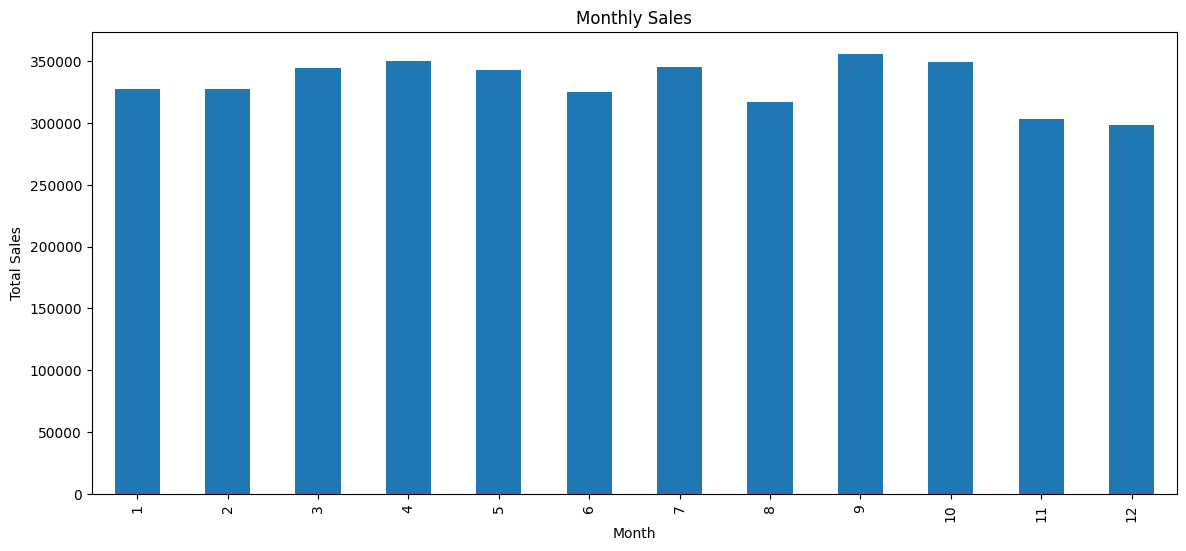

In [26]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()